<div>
      <img src="https://drive.google.com/uc?export=view&id=1XqMCyXys9E6QBvNAW8QSTAdT0dkB8aAa" width="40%" align="right"/>
</div>

<div>
        <br><h4>Daniel Brauner, Felix Scharf, Herbi Shtini</h4>
</div>

<h1><center>Thema: Deutsche Mietpreisanalyse</center></h1>

# 1. Business Understanding

**Einleitung**

Warum haben wir uns für dieses Thema entschieden?

Grundlage dieser Datenanalyse war der Gedanke, ein Thema zu finden, mit dem man sich identifizieren kann. Der meist mühsame Akt der Wohnungssuche hat sich als ein geeignet erwiesen. Die Gründe für einen Umzug können vielfältig sein und doch ist der Prozess nach der Entscheidung umziehen zu wollen meist der gleiche: Man geht auf die Suche nach geeigneten Inseraten.

Das kann entweder über Printmedien geschehen, direkte persönliche Kontakte oder übers Internet. Das Internet bietet ein breites Spektrum an Websites und Apps für mobile Endgeräte an, die den Zweck erfüllen, Inserate von Immobilien als Anbieter einzustellen und als Interessent anzusehen um Kontakt zum Anbieter aufzunehmen. 
Das Portal Immoscout24 ist eines der prominentesten Portale für Anbieter und Interessenten. 

In dieser Analyse wird die Sicht eines Interessenten betrachtet, der/die gerne zur Miete in eine Wohnung ziehen möchte. Aus persönlicher Erfahrung heraus besteht die Herausforderung bei der Suche darin, dass der Immobilienmarkt nicht vollständig transparent ist. Unklar ist, ob ein Angebot für die örtlichen Gegebenheiten günstig, normalpreisig oder teuer ist. Ebenfalls ist der Indikator, wie viel Miete man im Durchschnitt für ein Zielobjekt zahlen muss meist subjektiv. 

Diese Datenanalyse soll bei der Bewertung und dem Preisempfinden eine Hilfestellung bieten, die auf realen Daten basiert.

Nach der Recherche wurde ein großer Datensatz von Kaggle.com gefunden, der die bundesweiten Mietangebote von Immoscout24 über einen Zeitraum von 2018-2020 mit diversen Features enthält. Dieser Datensatz bildet die Grundlage der folgenden Zielsetzung und des Datananalyseprojekts.

Die Quelle ist https://www.kaggle.com/corrieaar/apartment-rental-offers-in-germany 

Geplant ist, die Zielsetzung durch Einsatz von Regression zu beleuchten, die die Warmmiete unter verschiedenen Apekten prognostiziert. Die Warmmiete wurde als zu prognostizierende Größe gesetzt, da sie später auch tatsächlich gezahlt wird.






**Was ist die Zielsetzung?**



1.   Es soll eine Schätzung entstehen, wie viel Mietkosten eine Person für eine Wohnung mit bestimmten Merkmalen zahlen muss.  
2.   Ist ein bei Immobilienscout 24 gefundenes Angebot günstig, normal, oder teuer?

 

**Business Case**

*   Spezifische Budgetplanung bei der Wohnungssuche
*   Hilfestellung durch Preisbewertung eines gefundenen Angebots



**Weitere Erkenntnisse**

* Transparenz in den oftmals intransparenten Immobilienmarkt bringen
* Merkmale erkennen, die Wohnungen besonders teuer/preiswert machen

**Wie wird der Erfolg gemessen?**

* Gute Nutzung des Prognosemodells i.S. von Hilfestellung bei der Wohnungssuche
* Validierung der Güte des Modells durch Trainings- Testdaten
* Bestimmmung von Faktoren, die einen besonders starken Einfluss auf den Mietpreis haben. 




# 2. Data understanding

### Importe

Im Rahmen des Datenverständnisses oder Data Understandings wird versucht, sich einen ersten Überblick über die zur Verfügung stehenden Daten und deren Qualität zu verschaffen. Es erfolgt eine Analyse und Bewertung der Datenqualität. Probleme mit der Qualität der vorhandenen Daten werden identifiziert und ein weiteres Vorgehen mit diesen Daten festgelegt.

Im ersten Schritt werden die benötigten Bibliotheken installiert.
Wir verwenden numpy, pandas, seaborn und matplotlib. 

NumPy und Pandas sind Programmbibliotheken für die Programmiersprache Python, die die Handhabung großer mehrdimensionaler Arrays ermöglichen. 

Matplotlib und Seaborn sind ebenfalls Programmbibliotheken für Python, welche  Visualisierungen und Darstellungen ermöglichen.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as tkr

### Daten übersicht

Zunächst wird der Datensatz importiert.

Python verfügt nativ über eine CSV-Bibliothek. Über diese Bibliothek können wir unserem im .csv Dateiformat vorliegenden Datensatz direkt einlesen und verarbeiten.



In [2]:
df = pd.read_csv('data/immo_data.csv')

In [3]:
print(f'Spalten:', df.shape[0], ', Zeilen :',df.shape[1])

Spalten: 268850 , Zeilen : 49


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [5]:
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Baujahr')

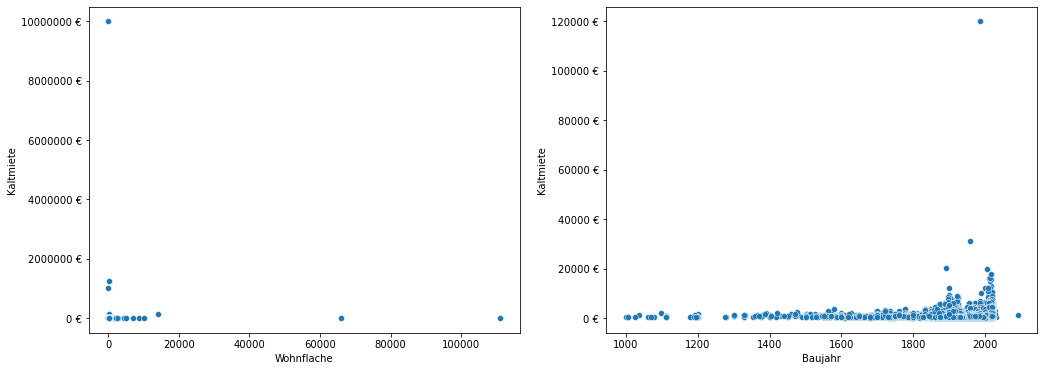

In [6]:
fig, axs = plt.subplots(figsize=(17, 6), ncols=2)
sns.scatterplot(df['livingSpace'], df['baseRent'], ax=axs[0])
sns.scatterplot(df['yearConstructed'], df['baseRent'], ax=axs[1])
axs[0].yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:.0f} €'.format(x)))
axs[0].set_xlabel('Wohnflache')
axs[0].set_ylabel('Kaltmiete')
axs[1].yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: '{:.0f} €'.format(x)))
axs[1].set_ylabel('Kaltmiete')
axs[1].set_xlabel('Baujahr')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

# 3. Data Preparation

Die Datenvorbereitung oder Data Preparation dient dazu, einen finalen Datensatz zu erstellen, der die Basis für die nächste Phase der Modellierung bildet.

### Outliers ausfiltern

In [8]:
outl = { 'bRentMin': 200, 'bRentMax': 2200, 'lSpaceMin': 20, 
        'lSpaceMax': 200,  'ycMin': 1800, 'ycMax': 2020, 
            'noRoomsMax': 10, 'floorMax': 20, 'noFloorsMax': 20}
outlDf=pd.DataFrame({'Merkmale': ['Kaltmiete', 'Wohnflache', 'Baujahr', 
                                  'Zimmer Anzahl', 'Etage', 'Anzahl Geschosse'], 
              'Minimum Wert': [outl['bRentMin'], outl['lSpaceMin'], 
                               outl['ycMin'], '-', '-', '-'], 
              'Maximum Wert': [outl['bRentMax'], outl['lSpaceMax'], outl['ycMax'], 
                               outl['noRoomsMax'], outl['floorMax'], 
                               outl['noFloorsMax']]}).T
outlDf.columns = outlDf.iloc[0]
outlDf.drop(outlDf.index[0], inplace=True)
outlDf

Merkmale,Kaltmiete,Wohnflache,Baujahr,Zimmer Anzahl,Etage,Anzahl Geschosse
Minimum Wert,200,20,1800,-,-,-
Maximum Wert,2200,200,2020,10,20,20


In [9]:
dfClean = df.loc[(
    (((df['baseRent'] > outl['bRentMin']) & (df['baseRent'] <= outl['bRentMax']))
     | df['baseRent'].isnull())
  & ( ((df['livingSpace'] >= outl['lSpaceMin']) 
       & (df['livingSpace'] <= outl['lSpaceMax'])) | df['livingSpace'].isnull())  
  & ( ( ( df['yearConstructed'] > outl['ycMin']) 
       & (df['yearConstructed'] < outl['ycMax'])) | df['yearConstructed'].isnull())
  & ( (df['noRooms'] <= outl['noRoomsMax'])  | df['noRooms'].isnull())
  & ( (df['floor'] <= outl['floorMax'])  | df['floor'].isnull())
  & ( (df['numberOfFloors'] <= outl['noFloorsMax']) | df['numberOfFloors'].isnull())
  )]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Baujahr')

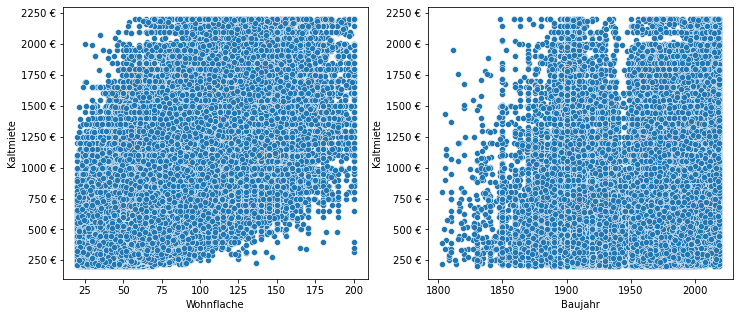

In [10]:
fig, axs = plt.subplots(figsize=(12, 5), ncols=2)
sns.scatterplot(dfClean['livingSpace'], dfClean['baseRent'], ax=axs[0])
sns.scatterplot(dfClean['yearConstructed'], dfClean['baseRent'], ax=axs[1])
axs[0].yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, 
                                                   p: '{:.0f} €'.format(x)))
axs[0].set_xlabel('Wohnflache')
axs[0].set_ylabel('Kaltmiete')
axs[1].yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, 
                                                   p: '{:.0f} €'.format(x)))
axs[1].set_ylabel('Kaltmiete')
axs[1].set_xlabel('Baujahr')

### Unnötige Spalten

Der Datensatz enthält eine große Anzahl an Regionen und Städten.

In der folgenden Übersicht wird die Anzahl der Inserate pro Region/Stadt dargestellt.


In [11]:
dfClean['regio2'].value_counts().head(35)

Leipzig                                   13411
Chemnitz                                  11215
Berlin                                     9317
Dresden                                    7225
Magdeburg                                  4721
Halle_Saale                                4324
Essen                                      4286
Frankfurt_am_Main                          3526
Duisburg                                   3462
Düsseldorf                                 3444
Hamburg                                    3402
München                                    3278
Dortmund                                   3078
Gelsenkirchen                              2891
Mittelsachsen_Kreis                        2761
Recklinghausen_Kreis                       2707
Köln                                       2521
Zwickau                                    2335
Wuppertal                                  2316
Leipzig_Kreis                              2130
Meißen_Kreis                            

In [12]:
dfClean = dfClean.loc[dfClean['regio2'].isin(
    ['Berlin', 'München', 'Hamburg', 'Köln', 
     'Frankfurt_am_Main', 'Stuttgart'])]


Um mögliche fehlende Daten zu identifizieren, sortieren wir die Daten absteigend nach Anzahl der Datenpunkte der jeweiligen Merkmale.

In [13]:
def getAvailableValues(df, norows = 5):   # input by the df and the number of rows that you want to show
    total = df.notnull().sum().sort_values(ascending=False)
    percent = ((df.notnull().sum()
                .sort_values(ascending=False)/df.shape[0])*100)
                .sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, 
                             keys=['Total', 'Percent'])

    return(missing_data.head(norows))

availabilityDf = getAvailableValues(df, df.shape[1])
availabilityDf

,Total,Percent
regio1,268850,100.000000
geo_bln,268850,100.000000
regio3,268850,100.000000
regio2,268850,100.000000
livingSpaceRange,268850,100.000000
garden,268850,100.000000
noRoomsRange,268850,100.000000
noRooms,268850,100.000000
geo_plz,268850,100.000000
baseRentRange,268850,100.000000


Als Ergebnis dieser Auswertung wird festgelegt, dass Merkmale mit Verfügbarkeiten unter 60% nicht weiter betrachtet werden, da unter dieser Grenze die Aussagekraft abnimmt.

Der Datensatz wird nun weiter bereinigt und vorbereitet. 

In [14]:
under60Percent = availabilityDf.loc[availabilityDf['Percent'] < 60].index
under60Percent = under60Percent.drop(['interiorQual'])
under60Percent

Index(['petsAllowed', 'noParkSpaces', 'heatingCosts', 'lastRefurbish',
       'energyEfficiencyClass', 'electricityBasePrice', 'electricityKwhPrice',
       'telekomHybridUploadSpeed'],
      dtype='object')

In [15]:
dfClean = dfClean.drop(under60Percent, axis=1)
dfClean.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'street', 'streetPlain', 'lift',
       'baseRentRange', 'typeOfFlat', 'geo_plz', 'noRooms', 'thermalChar',
       'floor', 'numberOfFloors', 'noRoomsRange', 'garden', 'livingSpaceRange',
       'regio2', 'regio3', 'description', 'facilities', 'date'],
      dtype='object')

In [16]:
dfClean.head(3)

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,...,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,date
21,Baden_Württemberg,0.0,NaN,ONE_YEAR_FREE,False,False,13,5.63,40.0,1190.0,...,3.0,NaN,1,False,1,Stuttgart,Bad_Cannstatt,Helle 3-Zimmer-Wohnung mit Galerie in Bad Cann...,"Backofen, Badewanne, Bett 1,40x2m, Bettwäsche,...",Oct19
23,Bayern,180.0,central_heating,ONE_YEAR_FREE,False,False,18,4.47,10.0,2030.0,...,4.0,4.0,2,False,4,München,Altstadt,Die Wohnung (OHNE Balkon !!) liegt im 4. OG (O...,- Eichenparkettboden im Wohn-EZ u. im Schlafzi...,Oct19
24,Hamburg,140.0,central_heating,ONE_YEAR_FREE,False,True,9,6.30,40.0,760.0,...,2.0,4.0,3,False,2,Hamburg,Horn,Freuen Sie sich auf diese grundsanierte Wohnun...,Kabelanschluss; Warmwasser zentral (über Heiza...,May19


In [17]:
# Remove columns with unique values
def getUniqueCount(df):
  dfUniqs = pd.DataFrame({'uniques': []}, columns=df.columns)
  for column in df.columns:
      dfUniqs[column] = [len(df[column].unique())]
  dfUniqs = dfUniqs.T
  dfUniqs.columns = ['Unique']
  return dfUniqs
  

val = getUniqueCount(dfClean)
val

,Unique
regio1,6
serviceCharge,2943
heatingType,14
telekomTvOffer,4
newlyConst,2
balcony,2
picturecount,68
pricetrend,687
telekomUploadSpeed,7
totalRent,5732


In [18]:
dfClean[['scoutId', 'street', 'streetPlain', 'thermalChar', 'geo_plz', 
         'facilities', 'houseNumber', 'description']].head(3)

,scoutId,street,streetPlain,thermalChar,geo_plz,facilities,houseNumber,description
21,113836264,no_information,NaN,NaN,70376,"Backofen, Badewanne, Bett 1,40x2m, Bettwäsche,...",NaN,Helle 3-Zimmer-Wohnung mit Galerie in Bad Cann...
23,113626688,no_information,NaN,48.4,80331,- Eichenparkettboden im Wohn-EZ u. im Schlafzi...,NaN,Die Wohnung (OHNE Balkon !!) liegt im 4. OG (O...
24,111337159,B&ouml;melburgweg,Bömelburgweg,142.0,22111,Kabelanschluss; Warmwasser zentral (über Heiza...,14,Freuen Sie sich auf diese grundsanierte Wohnun...


In [19]:
dfClean = dfClean.drop(['scoutId', 'regio1', 'street', 'streetPlain', 
                        'thermalChar', 'geo_plz', 'facilities', 
                        'houseNumber', 'description'], axis=1)
dfClean.head(3)

,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,...,typeOfFlat,noRooms,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,date
21,0.0,NaN,ONE_YEAR_FREE,False,False,13,5.63,40.0,1190.0,NaN,...,apartment,1.5,3.0,NaN,1,False,1,Stuttgart,Bad_Cannstatt,Oct19
23,180.0,central_heating,ONE_YEAR_FREE,False,False,18,4.47,10.0,2030.0,1871.0,...,apartment,2.0,4.0,4.0,2,False,4,München,Altstadt,Oct19
24,140.0,central_heating,ONE_YEAR_FREE,False,True,9,6.30,40.0,760.0,1953.0,...,apartment,3.0,2.0,4.0,3,False,2,Hamburg,Horn,May19


Im weiteren Verlauf der Data Preparation können wir festellen, dass die Werte geo_krs und geo_bln identisch zu regio2 und somit entfernt werden können.

In [20]:
dfClean = dfClean.drop(['geo_bln', 'geo_krs'], axis=1, errors='ignore')
dfClean.head(3)

,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,...,typeOfFlat,noRooms,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,date
21,0.0,NaN,ONE_YEAR_FREE,False,False,13,5.63,40.0,1190.0,NaN,...,apartment,1.5,3.0,NaN,1,False,1,Stuttgart,Bad_Cannstatt,Oct19
23,180.0,central_heating,ONE_YEAR_FREE,False,False,18,4.47,10.0,2030.0,1871.0,...,apartment,2.0,4.0,4.0,2,False,4,München,Altstadt,Oct19
24,140.0,central_heating,ONE_YEAR_FREE,False,True,9,6.30,40.0,760.0,1953.0,...,apartment,3.0,2.0,4.0,3,False,2,Hamburg,Horn,May19


In [21]:
dfClean = dfClean.drop(['baseRentRange', 'yearConstructedRange', 
                        'noRoomsRange', 'livingSpaceRange'], axis=1)
dfClean.head()

,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,...,interiorQual,lift,typeOfFlat,noRooms,floor,numberOfFloors,garden,regio2,regio3,date
21,0.0,NaN,ONE_YEAR_FREE,False,False,13,5.63,40.0,1190.0,NaN,...,NaN,False,apartment,1.5,3.0,NaN,False,Stuttgart,Bad_Cannstatt,Oct19
23,180.0,central_heating,ONE_YEAR_FREE,False,False,18,4.47,10.0,2030.0,1871.0,...,NaN,False,apartment,2.0,4.0,4.0,False,München,Altstadt,Oct19
24,140.0,central_heating,ONE_YEAR_FREE,False,True,9,6.30,40.0,760.0,1953.0,...,normal,False,apartment,3.0,2.0,4.0,False,Hamburg,Horn,May19
45,320.0,central_heating,NaN,False,True,10,4.99,NaN,1140.0,NaN,...,NaN,True,ground_floor,3.0,0.0,3.0,False,Berlin,Staaken_Spandau,Feb20
46,0.0,NaN,NaN,False,False,28,5.92,NaN,2190.0,1900.0,...,NaN,False,NaN,4.0,NaN,NaN,False,Frankfurt_am_Main,Nordend_West,May19


Ebenfalls werden triviale Werte wie bespielsweise "telekomTVoffer" entfernt, da diese keine Relevanz für das weitere Vorgehen besitzen.

In [22]:
dfClean = dfClean.drop(['telekomUploadSpeed', 'pricetrend', 
                        'telekomTvOffer'], axis=1, errors='ignore')
dfClean.head(3)

,serviceCharge,heatingType,newlyConst,balcony,picturecount,totalRent,yearConstructed,firingTypes,hasKitchen,cellar,...,interiorQual,lift,typeOfFlat,noRooms,floor,numberOfFloors,garden,regio2,regio3,date
21,0.0,NaN,False,False,13,1190.0,NaN,NaN,False,False,...,NaN,False,apartment,1.5,3.0,NaN,False,Stuttgart,Bad_Cannstatt,Oct19
23,180.0,central_heating,False,False,18,2030.0,1871.0,district_heating,True,True,...,NaN,False,apartment,2.0,4.0,4.0,False,München,Altstadt,Oct19
24,140.0,central_heating,False,True,9,760.0,1953.0,district_heating,False,True,...,normal,False,apartment,3.0,2.0,4.0,False,Hamburg,Horn,May19


In [23]:
dfClean = dfClean.drop(['picturecount'], axis=1)

### Fehlende Werte

Um fehlende Werte schnell zu identifizieren, kann eine Heatmap sehr hilfreich sein. Zudem werden Korrelationen zwischen den Merkmalen visualisiert. 

**Wichtig!** Merkmale vom Typ Objekt werden hier nicht visualisiert.

<AxesSubplot:>

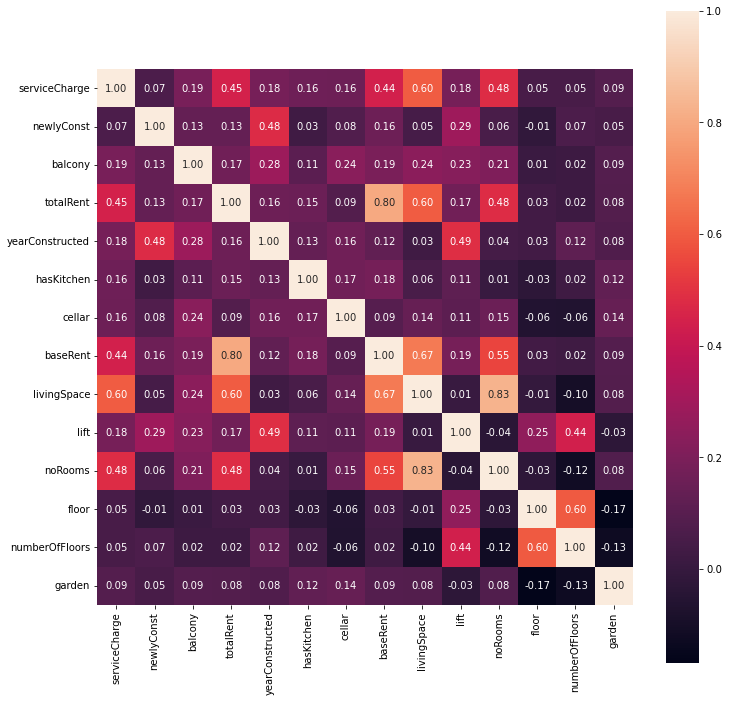

In [24]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dfClean.corr(), square = True, fmt='.2f', annot = True)

In [25]:
percList = getAvailableValues(dfClean, len(dfClean.columns))
percList = percList[percList['Percent'] < 100]
percList



,Total,Percent
serviceCharge,22848,97.130468
totalRent,21265,90.400884
typeOfFlat,20922,88.942737
floor,19971,84.899885
heatingType,19334,82.191897
yearConstructed,19237,81.779535
condition,17982,76.444331
firingTypes,17921,76.185010
numberOfFloors,16289,69.247120
interiorQual,14066,59.796795


#### Warmmiete und Nebenkosten

Hier zeigt sich die Auffälligkeit, dass eine sehr hohe Korrelation zwischen totalRent, baseRent und serviceCharge existiert. Bei der Überprüfung stellen wir fest, dass sich **totalRent** aus  **baseRent** + **serviceCharge** ergibt.

Wir können also bei fehlenden Werten einen Wert aus den beiden anderen Werten kalkulieren, sofern diese vorhanden sind.


In [26]:
dfClean.loc[ ((dfClean['totalRent'] >= dfClean['baseRent']) 
              & (dfClean['serviceCharge'].isnull() 
                 | dfClean['serviceCharge'] == 0)), 
            'serviceCharge'] = dfClean['totalRent'] - dfClean['baseRent']

# Set totalRent if serviceCharge is not null or not 0 
dfClean.loc[(dfClean['totalRent'].isnull() | (dfClean['totalRent'] == 0)) 
            & ~dfClean['serviceCharge'].isnull(), 
            'totalRent'] = dfClean['baseRent'] + dfClean['serviceCharge']
# totalRent smaller than baseRent
dfClean.loc[ (dfClean['totalRent'] < dfClean['baseRent']) 
            & ~dfClean['serviceCharge'].isnull(), 
            'totalRent'] = dfClean['baseRent'] + dfClean['serviceCharge']
dfClean.loc[ (dfClean['totalRent'] < dfClean['baseRent']) 
            & dfClean['serviceCharge'].isnull(), 
            'totalRent'] = dfClean['baseRent']


dfClean[['serviceCharge', 'totalRent']].isnull().sum()

serviceCharge    675
totalRent        171
dtype: int64

Einige Einträge haben keine serviceCharge und keinen totalPrice. In diesen Fällen wird serviceCarge mit 17% von baseRent berechnet. Das ist der durchschnittliche prozentuale Anteil der serviceCarge, basierend auf den vollständigen Daten.

In [27]:
serviceCoeff = (dfClean['serviceCharge'].mean() / dfClean['baseRent'].mean())
serviceCoeff

0.16350048526683789

In [28]:
# Calculate service coefficient and serviceCharge
serviceCoeff = (dfClean['totalRent'].mean() / dfClean['baseRent'].mean()) - 1
dfClean['serviceCharge'] = dfClean['serviceCharge'].fillna(
    dfClean['baseRent'] + (dfClean['baseRent'] * serviceCoeff))

# Recalculate totalRent after serviceCharge is set
dfClean.loc[dfClean['totalRent'].isnull() | (dfClean['totalRent'] == 0), 
            'totalRent'] = dfClean['baseRent'] + dfClean['serviceCharge']

dfClean[['serviceCharge', 'totalRent']].isnull().sum()

serviceCharge    0
totalRent        0
dtype: int64

In [29]:
dfClean['typeOfFlat'].value_counts()

apartment              13555
ground_floor            2213
roof_storey             2093
maisonette               775
other                    743
raised_ground_floor      562
terraced_flat            425
penthouse                325
half_basement            134
loft                      97
Name: typeOfFlat, dtype: int64

##### Wohnungstyp
Es zeigt sich, dass bei Wohnungen floor=0 ausgegeben wird. Wir weisen diese Wohnungen dem Merkmal ground_floor zu.
Außerdem ordnen wir "apartment" dem Rest der Nullwerte zu, da es den größten Anteil ausmacht.

In [30]:
# we assign 'ground_floor' to all flats of floor zero that are missing
dfClean.loc[dfClean['typeOfFlat'].isnull() & (dfClean['floor'] == 0), 
            'typeOfFlat'] = 'ground_floor'
# we assing 'apartment to the rest' considering it consist of the biggest part
dfClean['typeOfFlat'] = dfClean['typeOfFlat'].fillna('apartment') 

##### Heizungsart

In [31]:
dfClean.loc[( (dfClean['firingTypes'] == 'district_heating') 
             & (dfClean['heatingType'].isnull()) ), 
            'heatingType'] = 'district_heating'
dfClean.loc[( (dfClean['firingTypes'] == 'geothermal') 
             & (dfClean['heatingType'].isnull()) ), 
            'heatingType'] = 'heat_pump'

dfClean['heatingType'] = dfClean['heatingType'].fillna('central_heating')

dfClean = dfClean.drop(['firingTypes'], axis=1)

**Baujahr**

In [32]:
meanLiftYear = dfClean.loc[((dfClean["lift"] == True) 
                            & dfClean["yearConstructed"].notnull()), 
                           "yearConstructed"].mean()
meanLiftYear = round(meanLiftYear, 0)
meanLiftYear
dfClean.loc[dfClean["yearConstructed"].isnull() & dfClean["lift"] == True, 
            "yearConstructed"] = meanLiftYear

meanConstYear = round(dfClean["yearConstructed"].mean(), 0)
dfClean["yearConstructed"] = dfClean["yearConstructed"].fillna(meanConstYear)

##### Innere Qualität

In [33]:
iqMeans = dfClean.groupby('interiorQual')['baseRent'].mean()
iqMeans

interiorQual
luxury           1503.210983
normal            835.757759
simple            754.629677
sophisticated    1201.471595
Name: baseRent, dtype: float64

In [34]:
dfClean.loc[dfClean["interiorQual"].isnull() 
            & (dfClean["baseRent"] >= iqMeans['luxury']*0.9),
            "interiorQual"] = "luxury"

dfClean.loc[dfClean["interiorQual"].isnull() 
            & (dfClean["baseRent"] >= iqMeans['sophisticated']*0.9) 
            & (dfClean["baseRent"] < iqMeans['luxury']*0.9),
            "interiorQual"] = "sophisticated"

dfClean.loc[(dfClean["interiorQual"].isnull() 
        & (dfClean["baseRent"] >= iqMeans['normal']*0.9) 
             & (dfClean["baseRent"] < iqMeans['sophisticated']*0.9)),
            "interiorQual"] = "normal"

dfClean.loc[(dfClean["interiorQual"].isnull() 
        & (dfClean["baseRent"] >= iqMeans['simple']*0.9) 
             & (dfClean["baseRent"] < iqMeans['normal']*0.9)),
            "interiorQual"] = "simple"

dfClean["interiorQual"] = dfClean["interiorQual"].fillna("normal")

##### Wohnungszustand

In [35]:
dfClean["condition"].value_counts()

well_kept                             4586
first_time_use                        3101
mint_condition                        3081
fully_renovated                       1962
modernized                            1912
first_time_use_after_refurbishment    1891
refurbished                           1250
need_of_renovation                     103
negotiable                              96
Name: condition, dtype: int64

In [36]:
conMeans = dfClean.groupby('condition')['baseRent'].mean()
conMeans

condition
first_time_use                        1291.780845
first_time_use_after_refurbishment    1119.285457
fully_renovated                       1066.344348
mint_condition                        1264.888205
modernized                             885.105476
need_of_renovation                     718.937087
negotiable                             975.430937
refurbished                           1052.784376
well_kept                              952.945133
Name: baseRent, dtype: float64

In [37]:
dfClean.loc[(dfClean['newlyConst'] == True) & dfClean['condition'].isnull(), 
            'condition'] = 'first_time_use'

dfClean.loc[(dfClean['newlyConst'] == False) 
& dfClean['condition'].isnull() 
            & (dfClean['baseRent'] >= conMeans['fully_renovated']), 
            'condition'] = 'fully_renovated'

dfClean.loc[(dfClean['newlyConst'] == False) 
& dfClean['condition'].isnull() 
            & (dfClean["baseRent"] < conMeans['need_of_renovation']), 
            'condition'] = 'need_of_renovation'

dfClean['condition'] = dfClean['condition'].fillna('well_kept')


##### Etage

In [38]:
# Basement = -1
dfClean.loc[dfClean['floor'].isnull() 
            & (dfClean['typeOfFlat'] == 'half_basement'), 'floor'] = -1
# Ground floor, raised ground floor = 0
dfClean.loc[dfClean['typeOfFlat'].isin(['ground_floor', 'raised_ground_floor'])
         & dfClean['floor'].isnull(), 'floor'] = 0
dfClean.loc[dfClean['floor'].isnull() & (dfClean['garden'] == True), 'floor'] = 0
# terraced flat, penthouse, roof_storey = numberOfFloors
dfClean.loc[dfClean['floor'].isnull() & dfClean['typeOfFlat'].isin(
    ['terraced_flat', 'penthouse', 'roof_storey']), 
            'floor'] = dfClean['numberOfFloors']
# maisonette = numberOfFloors - 1
dfClean.loc[dfClean['floor'].isnull() & (dfClean['typeOfFlat'] == 'maisonette'),
            'floor'] = dfClean['numberOfFloors'] - 1
# Set the rest to mean
floorMean = dfClean['floor'].mean()  
dfClean['floor'] = dfClean['floor'].fillna(floorMean)    
dfClean.loc[(dfClean['floor'] > dfClean['numberOfFloors']), 
            'floor'] = dfClean['numberOfFloors']

##### Aufzug

In [39]:
nfMeans = dfClean.loc[(dfClean['lift'] == True) & ~dfClean['numberOfFloors'].isnull(), 
                      ['numberOfFloors', 'floor']].mean()
nfMean = round(nfMeans['numberOfFloors'], 0)
fMean = round(nfMeans['floor'], 0)

##### Anzahl Geschosse

In [40]:
dfClean.loc[dfClean['numberOfFloors'].isnull() & (dfClean['lift'] == True), 
            'numberOfFloors'] = max([nfMean, fMean])
dfClean['numberOfFloors'] = dfClean['numberOfFloors'].fillna(
    round(dfClean['numberOfFloors'].mean(), 0))
dfClean.loc[(dfClean['numberOfFloors'] < dfClean['floor']), 
            'numberOfFloors'] = dfClean['floor']



Jetzt sind keine Nullwerte mehr vorhanden.

In [41]:
dfClean.isnull().sum()

serviceCharge      0
heatingType        0
newlyConst         0
balcony            0
totalRent          0
yearConstructed    0
hasKitchen         0
cellar             0
baseRent           0
livingSpace        0
condition          0
interiorQual       0
lift               0
typeOfFlat         0
noRooms            0
floor              0
numberOfFloors     0
garden             0
regio2             0
regio3             0
date               0
dtype: int64

In [42]:
dfClean.columns

Index(['serviceCharge', 'heatingType', 'newlyConst', 'balcony', 'totalRent',
       'yearConstructed', 'hasKitchen', 'cellar', 'baseRent', 'livingSpace',
       'condition', 'interiorQual', 'lift', 'typeOfFlat', 'noRooms', 'floor',
       'numberOfFloors', 'garden', 'regio2', 'regio3', 'date'],
      dtype='object')

<AxesSubplot:>

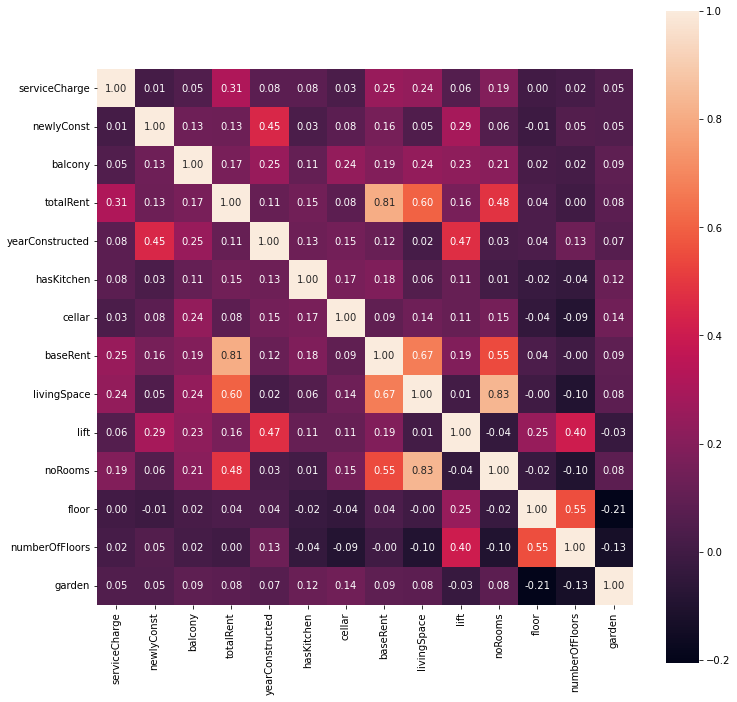

In [43]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(dfClean.corr(), square = True, fmt='.2f', annot = True)

### Ungültige Werte

In [44]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23523 entries, 21 to 268849
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   serviceCharge    23523 non-null  float64
 1   heatingType      23523 non-null  object 
 2   newlyConst       23523 non-null  bool   
 3   balcony          23523 non-null  bool   
 4   totalRent        23523 non-null  float64
 5   yearConstructed  23523 non-null  float64
 6   hasKitchen       23523 non-null  bool   
 7   cellar           23523 non-null  bool   
 8   baseRent         23523 non-null  float64
 9   livingSpace      23523 non-null  float64
 10  condition        23523 non-null  object 
 11  interiorQual     23523 non-null  object 
 12  lift             23523 non-null  bool   
 13  typeOfFlat       23523 non-null  object 
 14  noRooms          23523 non-null  float64
 15  floor            23523 non-null  float64
 16  numberOfFloors   23523 non-null  float64
 17  garden    

In [45]:
dfClean.describe()

,serviceCharge,totalRent,yearConstructed,baseRent,livingSpace,noRooms,floor,numberOfFloors
count,23523.000000,23523.000000,23523.00000,23523.000000,23523.000000,23523.000000,23523.000000,23523.000000
mean,210.587361,1299.416429,1974.90996,1087.003839,73.092628,2.423955,2.316505,4.742295
std,231.513744,628.808567,38.11072,460.317972,29.203886,0.944596,2.006456,2.125173
min,0.000000,272.400000,1805.00000,202.400000,20.000000,1.000000,-1.000000,0.000000
25%,110.000000,875.000000,1960.00000,710.000000,53.105000,2.000000,1.000000,4.000000
50%,170.000000,1230.000000,1975.00000,1024.000000,70.000000,2.000000,2.000000,5.000000
75%,242.525000,1650.000000,2009.00000,1400.000000,90.000000,3.000000,3.000000,6.000000
max,2611.349518,51570.000000,2019.00000,2200.000000,200.000000,7.000000,20.000000,20.000000


##### **Warmiete und Nebenkosten**

Es zeigt sich, dass es noch 0-Werte für Nebenkosten gibt. Diese Werte werden erneut berechnet.

In [46]:
len(dfClean.loc[dfClean['serviceCharge'] == 0])

1007

In [47]:
dfClean.loc[dfClean['serviceCharge'] == 0, 
            'serviceCharge'] = serviceCoeff * dfClean['baseRent']
len(dfClean.loc[dfClean['serviceCharge'] == 0])

0

Dies wird ebenfalls für Wohnungen angewandt, bei denen die Nebenkosten die Kaltmiete übersteigen.

In [48]:
len(dfClean.loc[dfClean['serviceCharge'] > dfClean['baseRent']])

681

In [49]:
dfClean.loc[dfClean['serviceCharge'] > dfClean['baseRent'], 
            'serviceCharge'] = serviceCoeff * dfClean['baseRent']
len(dfClean.loc[dfClean['serviceCharge'] > dfClean['baseRent']])

0

In [50]:
len(dfClean.loc[dfClean['totalRent'] == dfClean['baseRent']])

1275

In [51]:
dfClean.loc[dfClean['totalRent'] == dfClean['baseRent'], 
            'totalRent'] = dfClean['baseRent'] + dfClean['serviceCharge']
len(dfClean.loc[dfClean['totalRent'] == dfClean['baseRent']])

0

In [52]:
dfClean[['baseRent', 'totalRent']].describe()

,baseRent,totalRent
count,23523.000000,23523.000000
mean,1087.003839,1313.547497
std,460.317972,636.909253
min,202.400000,272.400000
25%,710.000000,879.520000
50%,1024.000000,1244.000000
75%,1400.000000,1682.000000
max,2200.000000,51570.000000


In [53]:
len(dfClean.loc[(dfClean['totalRent'] - dfClean['serviceCharge'] 
                 != dfClean['baseRent']) 
                & (dfClean['totalRent'] > (dfClean['baseRent']*2))])

186

In [54]:
dfClean.loc[(dfClean['totalRent'] - dfClean['serviceCharge'] 
             != dfClean['baseRent']) 
            & (dfClean['totalRent'] > (dfClean['baseRent']*2)), 
            'totalRent'] = dfClean['baseRent'] * (1 + serviceCoeff) 

In [55]:
len(dfClean.loc[(dfClean['totalRent'] - dfClean['serviceCharge'] 
                 != dfClean['baseRent']) 
                & (dfClean['totalRent'] > (dfClean['baseRent']*2))])

0

##### Wohnflache

In [56]:
dfClean[['livingSpace', 'baseRent']].describe()

,livingSpace,baseRent
count,23523.000000,23523.000000
mean,73.092628,1087.003839
std,29.203886,460.317972
min,20.000000,202.400000
25%,53.105000,710.000000
50%,70.000000,1024.000000
75%,90.000000,1400.000000
max,200.000000,2200.000000


##### **Heizungsart**

In [57]:
dfClean['heatingType'].value_counts()

central_heating                   12946
district_heating                   3734
floor_heating                      2665
self_contained_central_heating     1716
gas_heating                        1397
oil_heating                         347
combined_heat_and_power_plant       274
heat_pump                           168
night_storage_heater                 83
electric_heating                     81
wood_pellet_heating                  63
stove_heating                        26
solar_heating                        23
Name: heatingType, dtype: int64

#### Wohnungszustand

In [58]:
dfClean['condition'].value_counts()

well_kept                             5836
fully_renovated                       4294
first_time_use                        3583
mint_condition                        3081
modernized                            1912
first_time_use_after_refurbishment    1891
need_of_renovation                    1580
refurbished                           1250
negotiable                              96
Name: condition, dtype: int64

Der Zustand "negotiable" ist nicht relevant. Daher wird dieser Wert durch einen auf der Innenausstattung basierenden Wert ersetzt.


In [59]:
dfClean.loc[dfClean['condition'] == 'negotiable', 'interiorQual'].value_counts()

normal           58
sophisticated    25
simple            8
luxury            5
Name: interiorQual, dtype: int64

In [60]:
dfClean.loc[(dfClean['condition'] == 'negotiable') 
            & (dfClean['interiorQual'] == 'luxury'), 
            'condition'] = 'fully_renovated'

dfClean.loc[(dfClean['condition'] == 'negotiable') 
            & (dfClean['interiorQual'] == 'sophisticated'), 
            'condition'] = 'modernized'

dfClean.loc[(dfClean['condition'] == 'negotiable') 
            & (dfClean['interiorQual'] == 'normal'), 
            'condition'] = 'well_kept'

dfClean.loc[(dfClean['condition'] == 'negotiable') 
            & (dfClean['interiorQual'] == 'simple'), 
            'condition'] = 'need_of_renovation'

##### Innere Qualität

In [61]:
dfClean['interiorQual'].value_counts()

sophisticated    10137
normal            8872
luxury            3722
simple             792
Name: interiorQual, dtype: int64

##### Wohnungstype

In [62]:
dfClean['typeOfFlat'].value_counts()

apartment              15992
ground_floor            2377
roof_storey             2093
maisonette               775
other                    743
raised_ground_floor      562
terraced_flat            425
penthouse                325
half_basement            134
loft                      97
Name: typeOfFlat, dtype: int64

### Mehr unnötige Werte

**Wohnungstyp**

In [63]:
dfClean = dfClean.loc[dfClean['typeOfFlat'].isin(
    ['apartment', 'ground_floor', 'roof_storey', 'maisonette'])]

**Heizungstyp**

In [64]:
dfClean = dfClean.loc[dfClean['heatingType'].isin(
    ['central_heating', 'district_heating', 'floor_heating'])]   

In [65]:
dfClean = dfClean.drop(['condition'], axis=1)

In [66]:
dfClean = dfClean.drop(['numberOfFloors'], axis=1)

### Bereinigte Daten speichern 

In [67]:
dfClean.shape

(17554, 19)

In [68]:
dfClean.to_pickle('data/immo_data_prepared_clean.pkl')

In [69]:
dfClean.describe()

,serviceCharge,totalRent,yearConstructed,baseRent,livingSpace,noRooms,floor
count,17554.000000,17554.000000,17554.000000,17554.000000,17554.000000,17554.000000,17554.000000
mean,193.918768,1310.526878,1978.274183,1088.904103,72.219166,2.404688,2.435918
std,92.877172,529.234558,36.556268,463.012890,28.900965,0.946582,2.045514
min,1.000000,272.400000,1805.000000,202.400000,20.000000,1.000000,-1.000000
25%,125.000000,880.000000,1964.000000,708.662500,52.700000,2.000000,1.000000
50%,180.000000,1250.000000,1983.000000,1032.000000,69.500000,2.000000,2.000000
75%,250.000000,1690.000000,2012.000000,1415.000000,89.467500,3.000000,3.000000
max,1290.000000,3000.000000,2019.000000,2200.000000,200.000000,7.000000,20.000000


# Zusammenfassung Data Preparation:

Der vorliegende Datensatz ist relativ umfangreich. Umso wichtiger war es für uns eine sinnvolle Data-Preparation vorzunehmen, um mit möglichst relevanten Daten weiterarbeiten zu können.

Wir haben hierfür untersucht welche Werte in ausreichender Anzahl vorhanden sind, um eine gewisse Aussagekraft zu bieten.

Wir haben festgelegt nur die sechs größten Städte des Datensatzes zu analysieren. Zudem war es wichtig innerhalb der 49 Spalten herauszufinden welche Spalten wirklich relevant sind oder welche sogar redundant sind. 





